# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes?
    2. How well those variables describe the bike demands?
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


# Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps
- We will follow these steps to arrive at the solution.
1. Reading, and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting Data into Training and Testing sets (Rescaling Features as well)
5. Feature Selection and Building Linear Model 
6. Residual Analysis
7. Predictions
8. Model Evaluation

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
pd.set_option('display.max_columns', None) 

## Step 1: Reading and Understanding the Data

In [2]:
# reading the dataset
df = pd.read_csv('day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

=========================================
**Dataset characteristics**
=========================================<br>	
Our Dataframe has the following fields:
	
- **instant**: record index
- **dteday**: date
- **season**: season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**: year (0: 2018, 1:2019)
- **mnth**: month ( 1 to 12)
- **holiday**: weather day is a holiday or not
- **weekday**: day of the week
- **workingday**: If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit**: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [3]:
# checking shape of the dataset
df.shape

(730, 16)

In [4]:
# checking for nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Our data has no null values.  

## Step 2: Visualising the Data

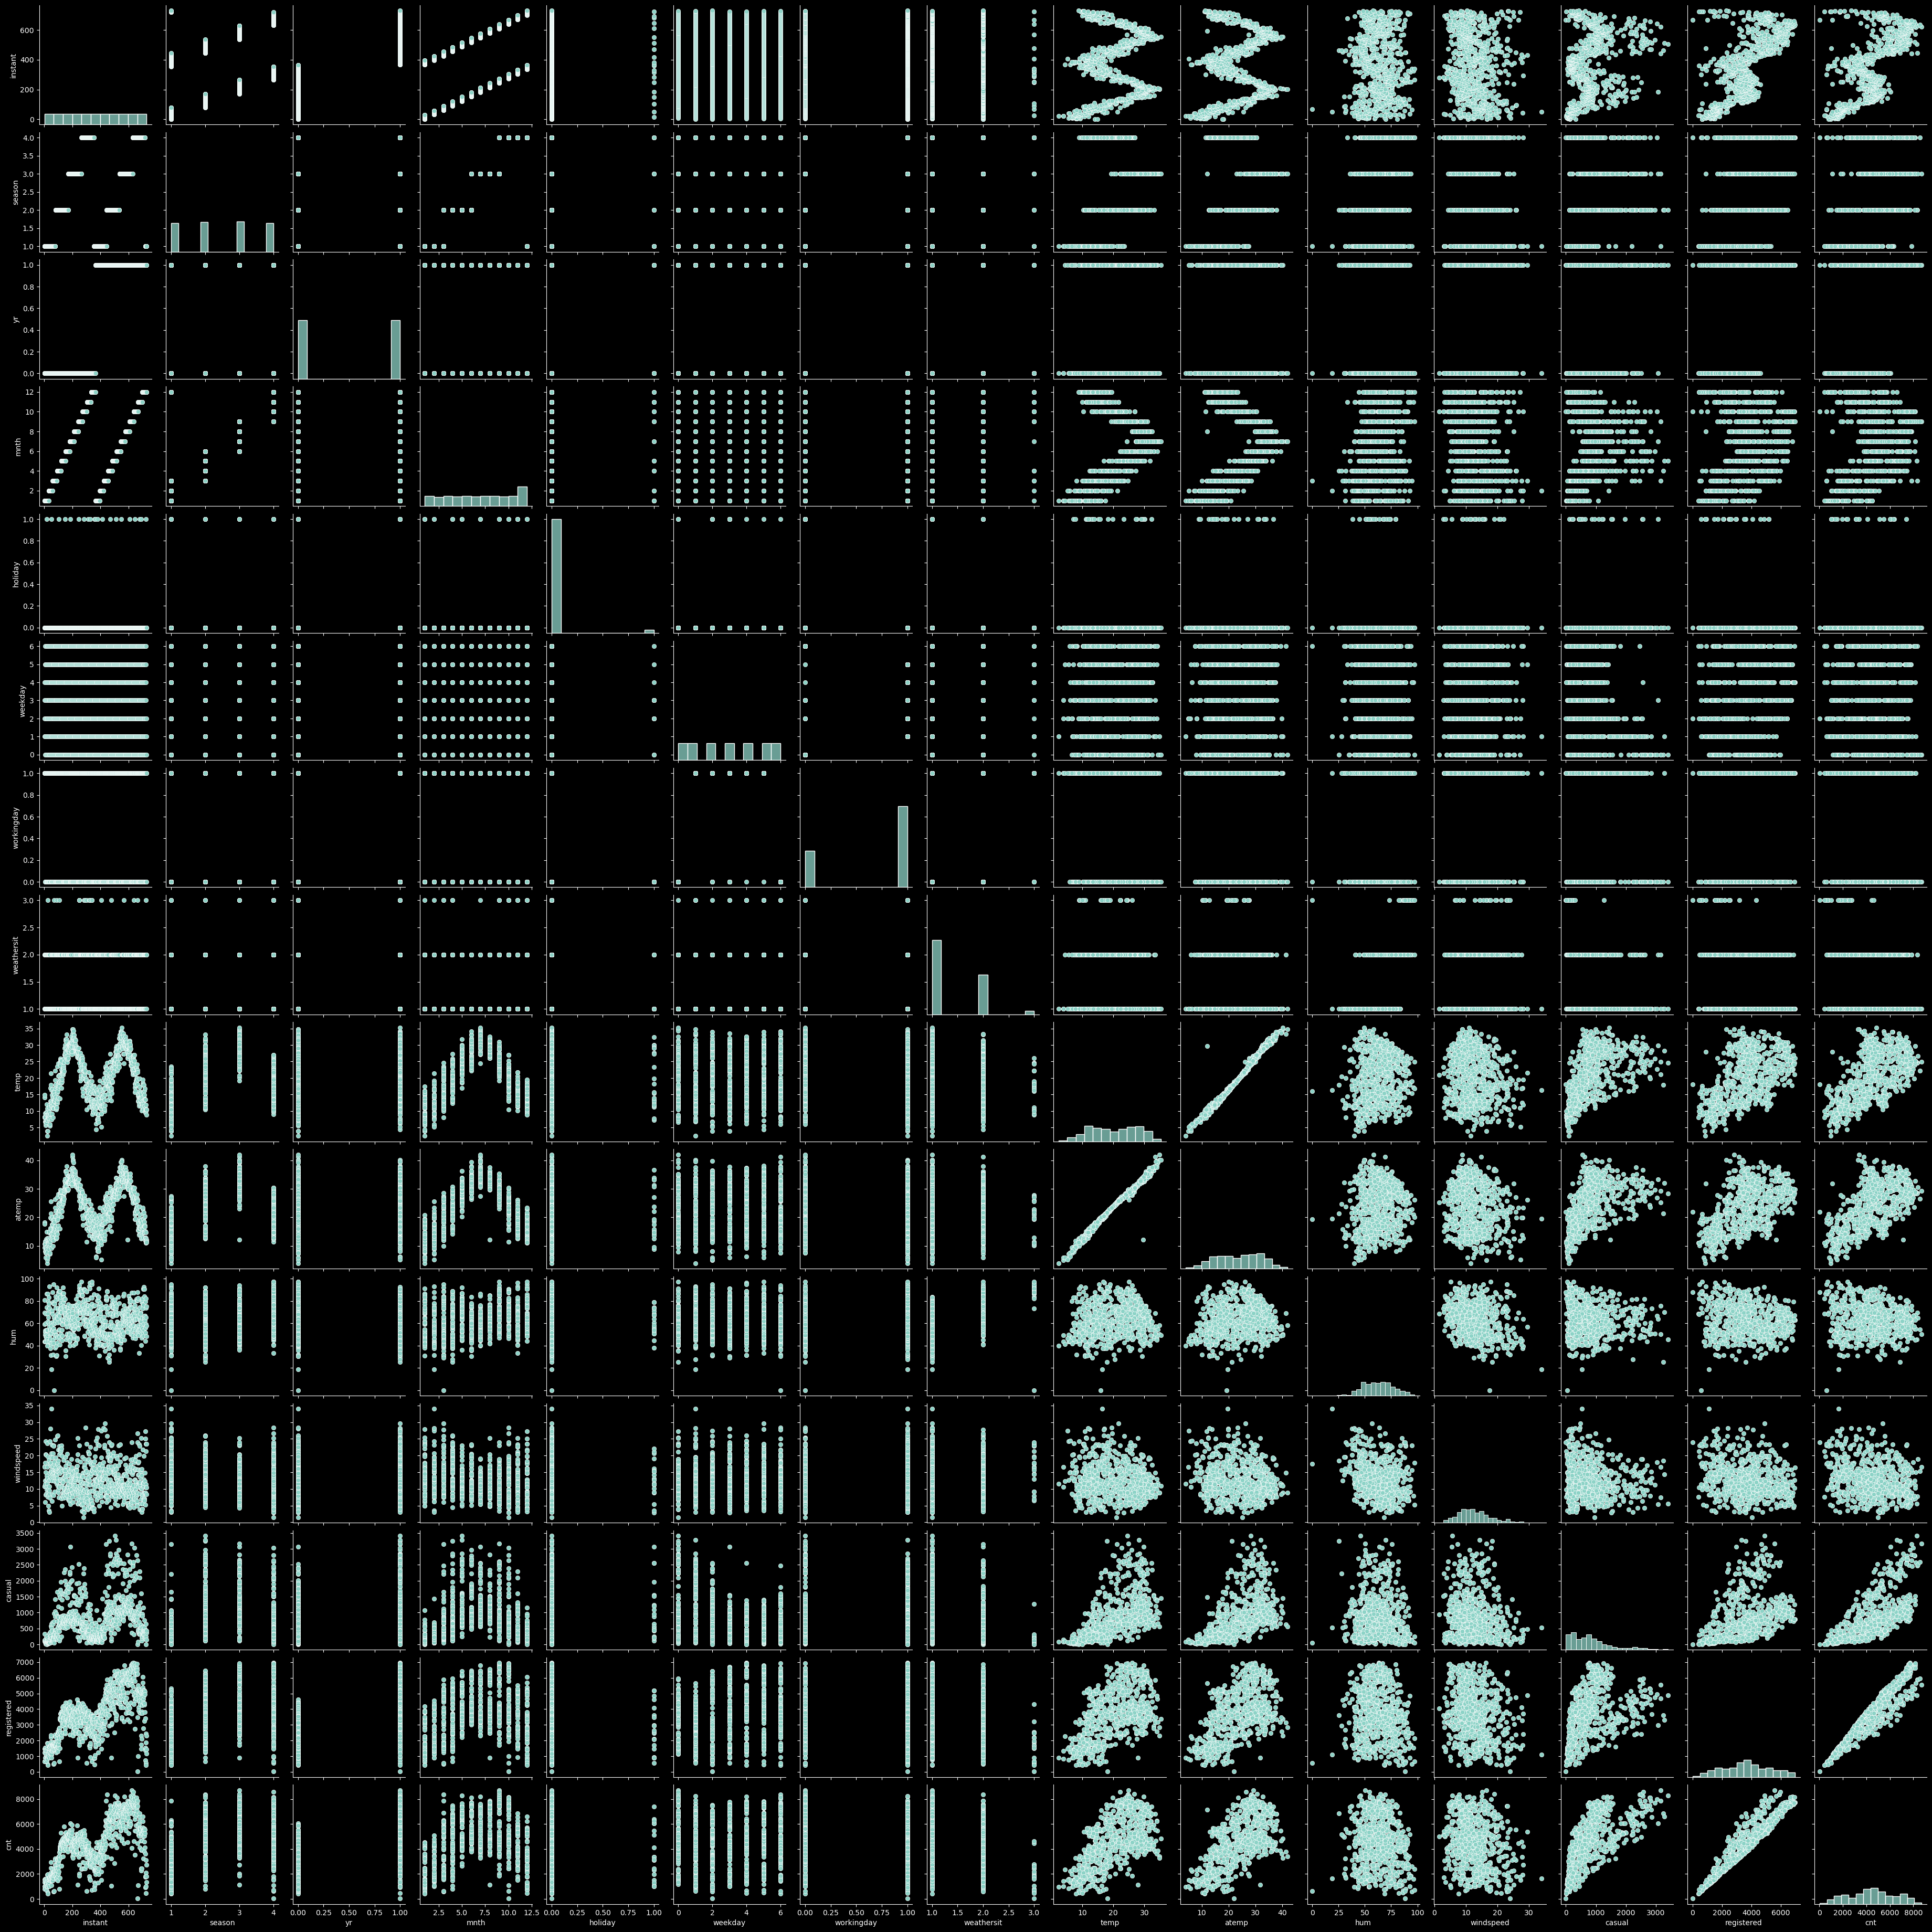

In [5]:
# plotting pairplot for numerical variables 
sns.pairplot(df)
plt.show() 

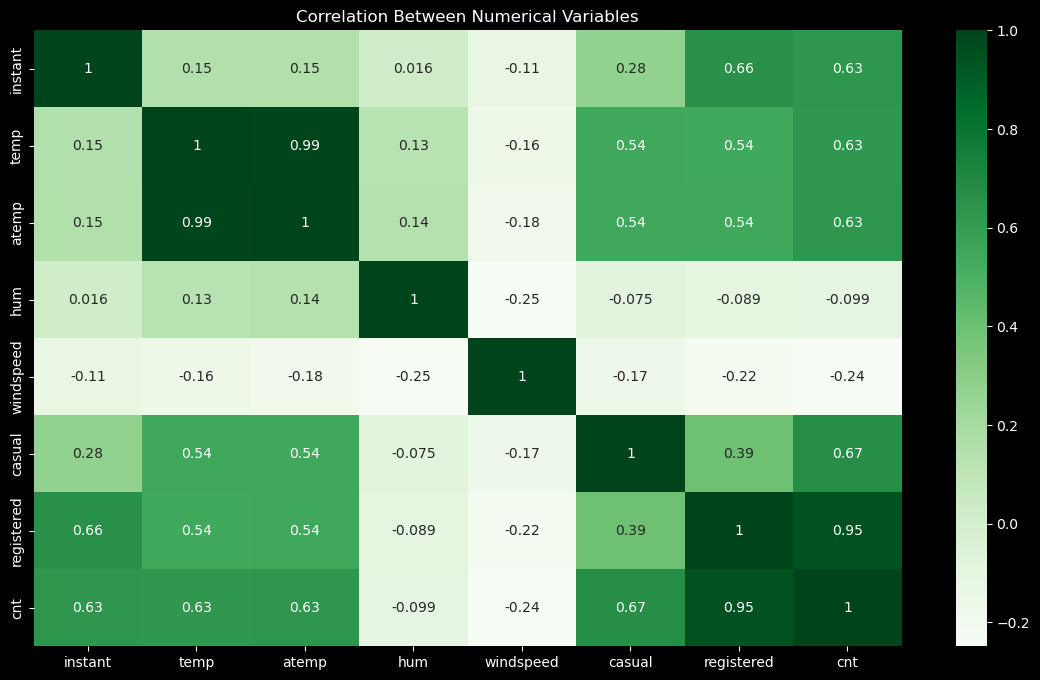

In [6]:
# plotting heatmap for numerical variables
num_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# plotting heatmap for the numerical vars to check correlation
plt.figure(figsize=(14, 8))
sns.heatmap(df[num_vars].corr(), annot=True, cmap='Greens')
plt.title('Correlation Between Numerical Variables')
plt.show() 

- There is a very high positive linear correlation between 'temp' and 'atemp', we can drop any one of them since both of the variables are telling about temperature and are highly collinear. Let's drop 'atemp'.
- Count('cnt') is highly positively corrleated with 'casual' and 'registered'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them add up to represent count.
- Another positive relationship that we can see is between temp and cnt. 
- Count is negatively correlated to 'windspeed' (~0.24 approx.). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days. 
---

#### EDA (Exploratory Data Analysis) 

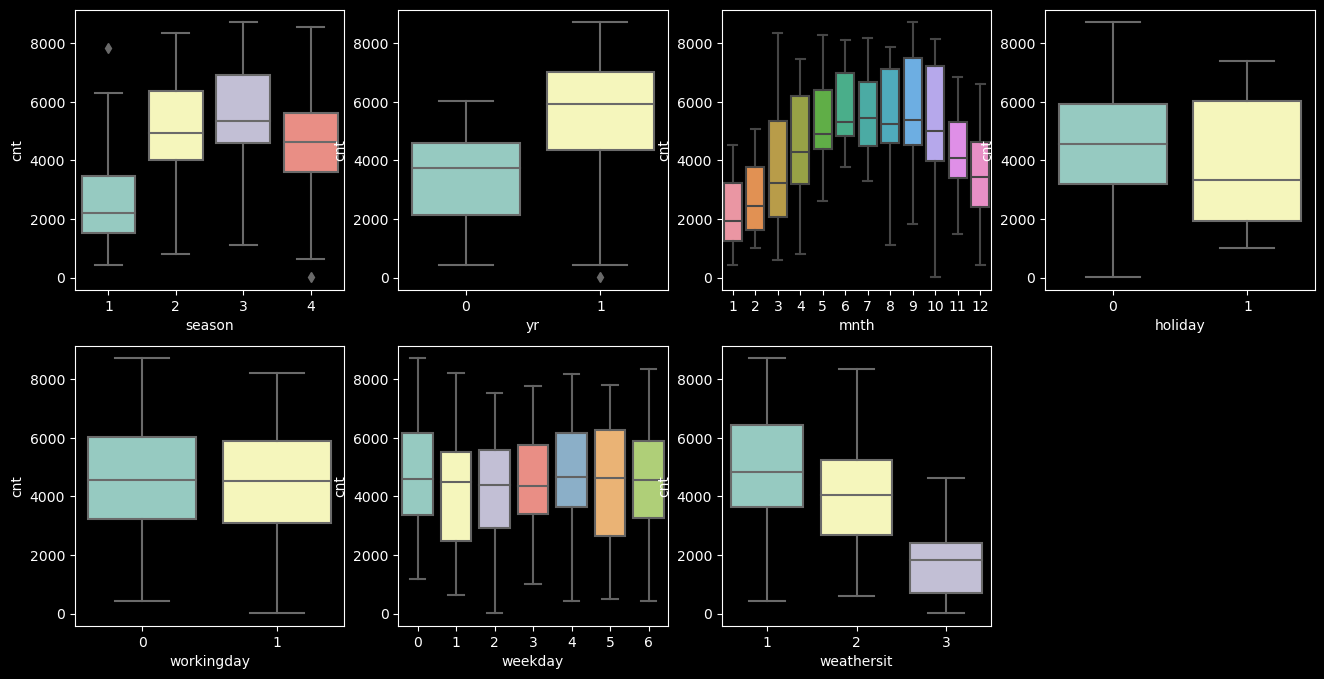

In [7]:
# boxplots for categorical variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
plt.figure(figsize=(16,8))
for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[cat_vars[i]], y=df.cnt)
plt.show()

- From above box plots we can derive following insights:
    1. Season 3 i.e. 'fall' season sees the most number of users on an average and season 1 i.e.'Spring' sees the least.
    2. There is a significant increase in number of users renting bikes from 2018 to 2019. 
    3. On an average, most number of users come to use Boombikes from June to October which is around 'fall' season only. 
    4. On holidays few people use BoomBike.
    5. Most users use BooBbike when its a clear weather and not when its rainy/stormy/misty. 

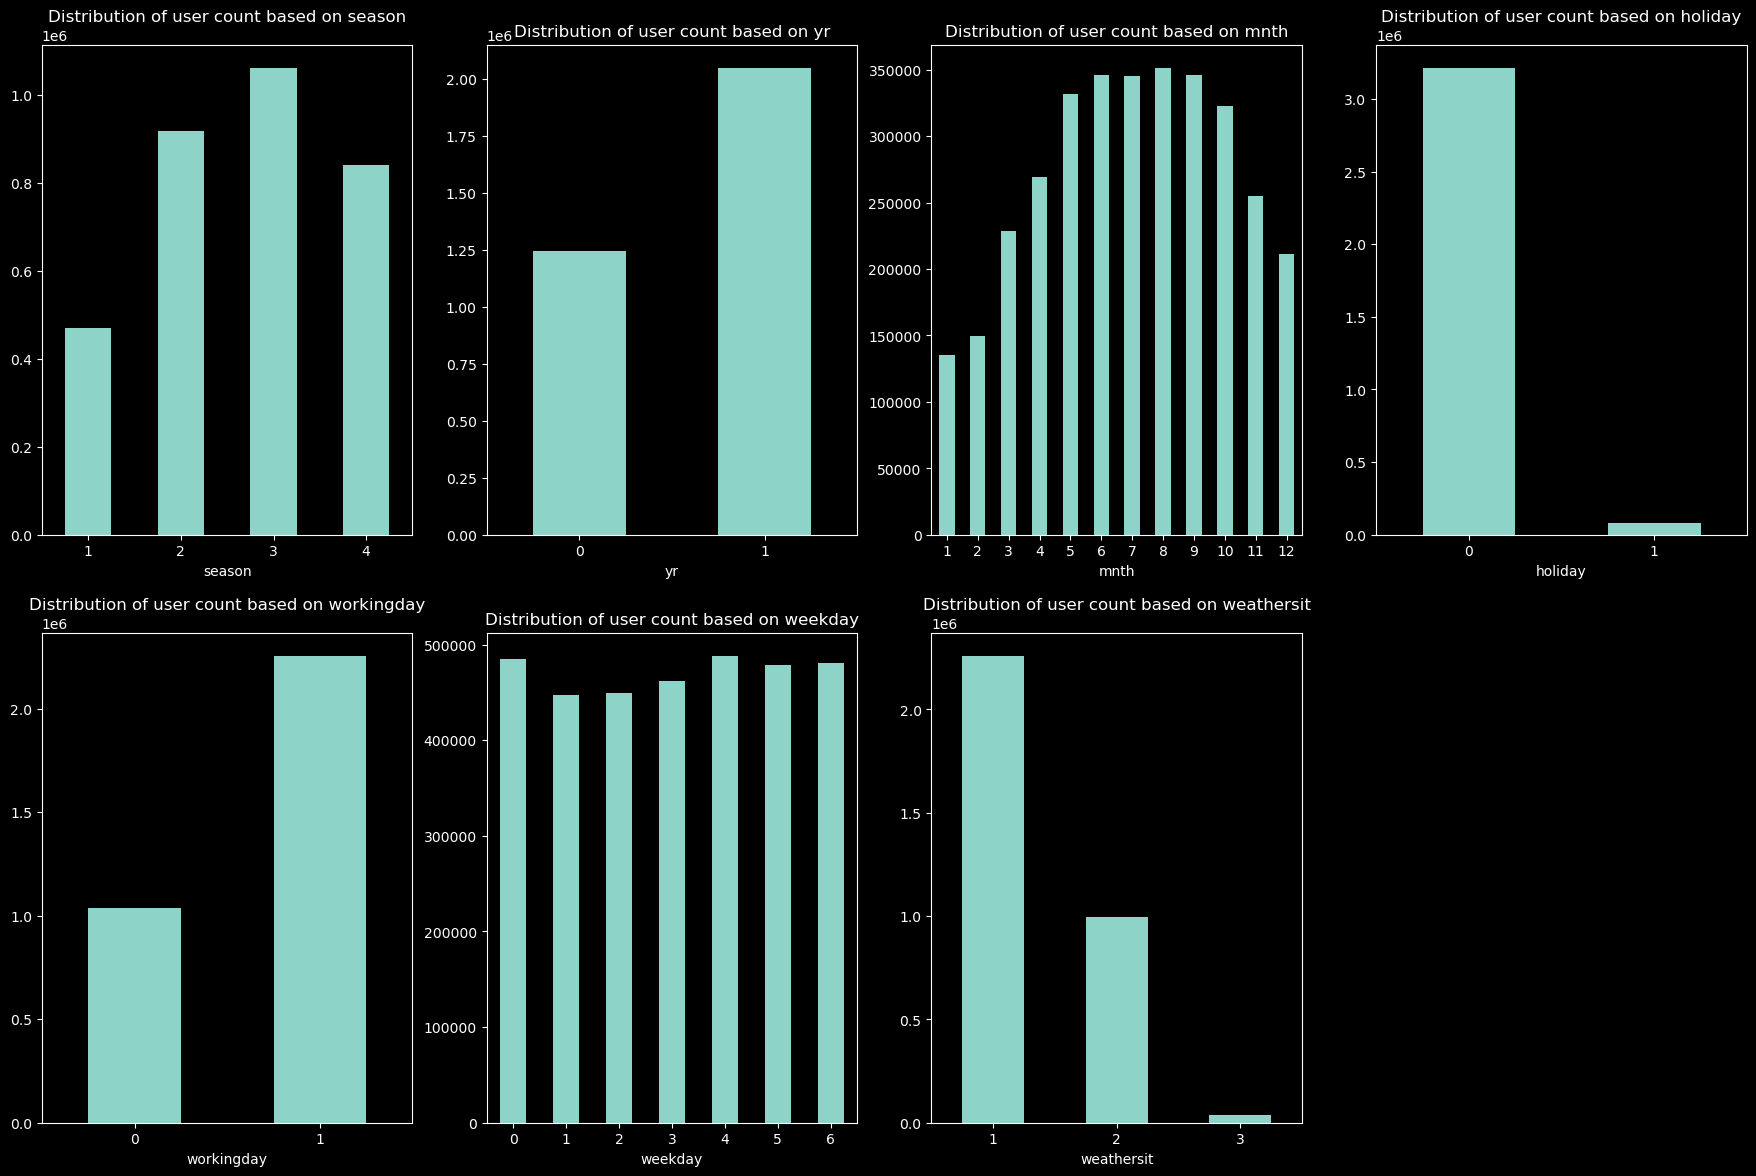

In [8]:
# plotting to see the odstribution of user count based on each categorical variable 
plt.figure(figsize=(22,14))
for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    df.groupby(cat_vars[i])['cnt'].sum().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title("Distribution of user count based on {}".format(cat_vars[i]))

plt.show() 

- From above Bar Graphs:
    - 'Fall' season attracts most customers which we saw in Box Plot analysis as well.
    - Sales almost doubled from 2018 to 2019.
    - Demand is highest from June to September.
    - Few people rent on holidays and weekends.
    - Clear weather is best for customers since they rent the bikes in that weather the most. 

## Step 3: Data Preparation
- Changing mnth, weekday, weathersit & season column's numerical values to categorical variables since there is no linear order associated with those labels. 
- In mnth changing:
    - 1,2,3..12 -> Jan, Feb, Mar, .. , Dec
- In weekday changing:
    - 1,2,3,...,7 -> Mon, Tue, Wed, .. , Sun
- In weathersit changing:
    - 1 -> Clear
    - 2 -> Mist
    - 3 -> Rainy
- In Season changing:
    - 1 -> Spring
    - 2 -> Summer
    - 3 -> Fall
    - 4 -> Winter

In [9]:
# replacing numerical values of a categorical variable (weathersit) with appropriate categorical values
df.weathersit = df.weathersit.replace([1,2,3], ['Clear', 'Mist', 'Rainy'])
df.weathersit.value_counts() 

weathersit
Clear    463
Mist     246
Rainy     21
Name: count, dtype: int64

In [10]:
# replacing numerical values of a categorical variable (season) with appropriate categorical values
df.season = df.season.replace([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter'])
df.season.value_counts() 

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [11]:
# mapping months to jan, feb, .., dec
df.mnth = df.mnth.map({1:'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun',
                       7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',11:'Nov', 12:'Dec'})
df.mnth.value_counts() 

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [12]:
# mapping weekday
df.weekday = df.weekday.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})
df.weekday.value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

#### Dropping Redundant Variables
- dteday -> (date is not required for our linear model, we have month and year columns and instance can be used as no. of days since BoomBike app has been launched. Hence, we don't require date column.)
- atemp -> this is same as temp, hence redundant. 
- registered and casual -> Our target variable is the sum of 'registered' and 'casual' and hence making a case of multicollinearity and overfitting if we use them. Hence, we will drop these two.

In [13]:
# dropping redundant variables
df.drop(columns=['dteday', 'atemp', 'casual', 'registered'], inplace=True) 
df.head()

instant  season  yr mnth  holiday weekday  workingday weathersit  \
0        1  Spring   0  Jan        0     Mon           1       Mist   
1        2  Spring   0  Jan        0     Tue           1       Mist   
2        3  Spring   0  Jan        0     Wed           1      Clear   
3        4  Spring   0  Jan        0     Thu           1      Clear   
4        5  Spring   0  Jan        0     Fri           1      Clear   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

In [14]:
# let's rename the instant column to days
# days column will show us 'no. of days since company started'
df.rename(columns={'instant':'days'}, inplace=True)

In [15]:
# describing data
df.describe()

days          yr     holiday  workingday        temp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.500000    0.028767    0.690411   20.319259   62.765175   
std    210.877136    0.500343    0.167266    0.462641    7.506729   14.237589   
min      1.000000    0.000000    0.000000    0.000000    2.424346    0.000000   
25%    183.250000    0.000000    0.000000    0.000000   13.811885   52.000000   
50%    365.500000    0.500000    0.000000    1.000000   20.465826   62.625000   
75%    547.750000    1.000000    0.000000    1.000000   26.880615   72.989575   
max    730.000000    1.000000    1.000000    1.000000   35.328347   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

- Our dataset ranges from 1st January, 2018 to 31st December, 2019 which is two years of BoomBikes' data.
- We will rescale the values later since we can see very high values in few of the columns. 

### Creating Dummy Variables 

In [16]:
mnth_dummy    = pd.get_dummies(df.mnth,       drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(df.weekday,    drop_first=True, dtype=int)
weather_dummy = pd.get_dummies(df.weathersit, drop_first=True, dtype=int)
season_dummy  = pd.get_dummies(df.season,     drop_first=True, dtype=int)  

- Creating n - 1 dummy variables where n is number of categories in the variable. 
    - For eg: in season we have 4 categories:
        - Summer, winter, spring and fall
        - So, creating only 3 dummy variables for season. 
        - This is done to avoid multicollinearity and overfitting.
            - For eg: 
            - `100` means its the first season.
            - `010` means its 2nd season.
            - `001` means its 3rd season.
            - `000` means its 4th season. 
        - Hence, only n-1 dummies are enough to know all the n categories.

In [17]:
# since we created dummy for these categorical variables, hence we don't need them and can drop these
df.drop(columns=['mnth', 'weekday', 'weathersit', 'season'], inplace=True)

In [18]:
# merging dummy variables to our dataframe
df = pd.concat([df, season_dummy, weather_dummy, mnth_dummy, weekday_dummy], axis=1)
df.head() 

days  yr  holiday  workingday       temp      hum  windspeed   cnt  Spring  \
0     1   0        0           1  14.110847  80.5833  10.749882   985       1   
1     2   0        0           1  14.902598  69.6087  16.652113   801       1   
2     3   0        0           1   8.050924  43.7273  16.636703  1349       1   
3     4   0        0           1   8.200000  59.0435  10.739832  1562       1   
4     5   0        0           1   9.305237  43.6957  12.522300  1600       1   

   Summer  Winter  Mist  Rainy  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0       0       0     1      0    0    0    0    1    0    0    0    0    0   
1       0       0     1      0    0    0    0    1    0    0    0    0    0   
2       0       0     0      0    0    0    0    1    0    0    0    0    0   
3       0       0     0      0    0    0    0    1    0    0    0    0    0   
4       0       0     0      0    0    0    0    1    0    0    0    0    0   

   Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
0    0    0    1    0    0    0    0    0  
1    0    0    0    0    0    0    1    0  
2    0    0    0    0    0    0    0    1  
3    0    0    0    0    0    1    0    0  
4    0    0    0    0    0    0    0    0

- Following catogories were dropped in process of dummy variable creation to avoid multicollinearity
    - **Fall** dropped:   If it's not Spring or summer or winter, its Fall
    - **Clear** dropped:  If it's not mist or rainy, its Clear
    - **April** dropped:  Similarly, its april if all rest months are False
    - **Friday** dropped: Similarly, its Friday if all rest weekdays are False

## Step 4: Splitting Dataframe into Training and Testing sets

### Train-Test Split

In [19]:
# splitting dataframe into train and test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=39) 

In [20]:
# checking the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling Data
- We will not rescale the columns having 0s & 1s since they are already in the range of 0 and 1.

In [21]:
# instantiate an object
scaler = MinMaxScaler()

#list of numerical variables without 0s and 1s
num_vars = ['days', 'temp', 'hum', 'windspeed', 'cnt']

# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head() 

days  yr  holiday  workingday      temp       hum  windspeed  \
551  0.755830   1        0           0  0.956434  0.463581   0.218019   
567  0.777778   1        0           1  0.746235  0.784062   0.105001   
634  0.869684   1        0           1  0.723364  0.710368   0.192482   
511  0.700960   1        0           1  0.775641  0.716795   0.367414   
363  0.497942   0        0           0  0.281182  0.654670   0.192471   

          cnt  Spring  Summer  Winter  Mist  Rainy  Aug  Dec  Feb  Jan  Jul  \
551  0.710624       0       0       0     0      0    0    0    0    0    1   
567  0.858886       0       0       0     1      0    0    0    0    0    1   
634  0.856791       0       0       1     1      0    0    0    0    0    0   
511  0.757949       0       1       0     0      0    0    0    0    0    0   
363  0.315258       1       0       0     0      0    0    1    0    0    0   

     Jun  Mar  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
551    0    0    0    0    0    0    0    1    0    0    0    0  
567    0    0    0    0    0    0    1    0    0    0    0    0  
634    0    0    0    0    0    1    0    0    0    0    0    0  
511    0    0    1    0    0    0    1    0    0    0    0    0  
363    0    0    0    0    0    0    0    0    1    0    0    0

In [22]:
# verifying rescaling 
# by checking max and min values of all cols must be 1 & 0 resp.
df_train.describe() 

days          yr     holiday  workingday        temp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.499976    0.496078    0.027451    0.686275    0.524539    0.644008   
std      0.292031    0.500476    0.163554    0.464462    0.241456    0.146478   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250343    0.000000    0.000000    0.000000    0.311949    0.542868   
50%      0.495885    0.000000    0.000000    1.000000    0.530590    0.639935   
75%      0.758230    1.000000    0.000000    1.000000    0.735616    0.746572   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt     Spring      Summer      Winter        Mist  \
count  510.000000  510.000000  510.00000  510.000000  510.000000  510.000000   
mean     0.320151    0.500058    0.24902    0.233333    0.250980    0.341176   
std      0.168557    0.238454    0.43287    0.423368    0.434003    0.474570   
min      0.000000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%      0.195508    0.333436    0.00000    0.000000    0.000000    0.000000   
50%      0.300805    0.506532    0.00000    0.000000    0.000000    0.000000   
75%      0.413194    0.673096    0.00000    0.000000    0.750000    1.000000   
max      1.000000    1.000000    1.00000    1.000000    1.000000    1.000000   

            Rainy         Aug         Dec         Feb         Jan         Jul  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.027451    0.088235    0.082353    0.080392    0.082353    0.098039   
std      0.163554    0.283915    0.275172    0.272166    0.275172    0.297660   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.086275    0.074510    0.092157    0.080392    0.080392   
std      0.266010    0.281045    0.262857    0.289531    0.272166    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mon         Sat         Sun         Thu         Tue         Wed  
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.152941    0.149020    0.141176    0.131373    0.127451    0.149020  
std      0.360284    0.356457    0.348545    0.338139    0.333805    0.356457  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

- Scaling is done properly on training set since all Min and Max values are 0 and 1 respectively. Now we can move on to build our linear model.

## Step: 5 Feature Selection and Building Linear Model

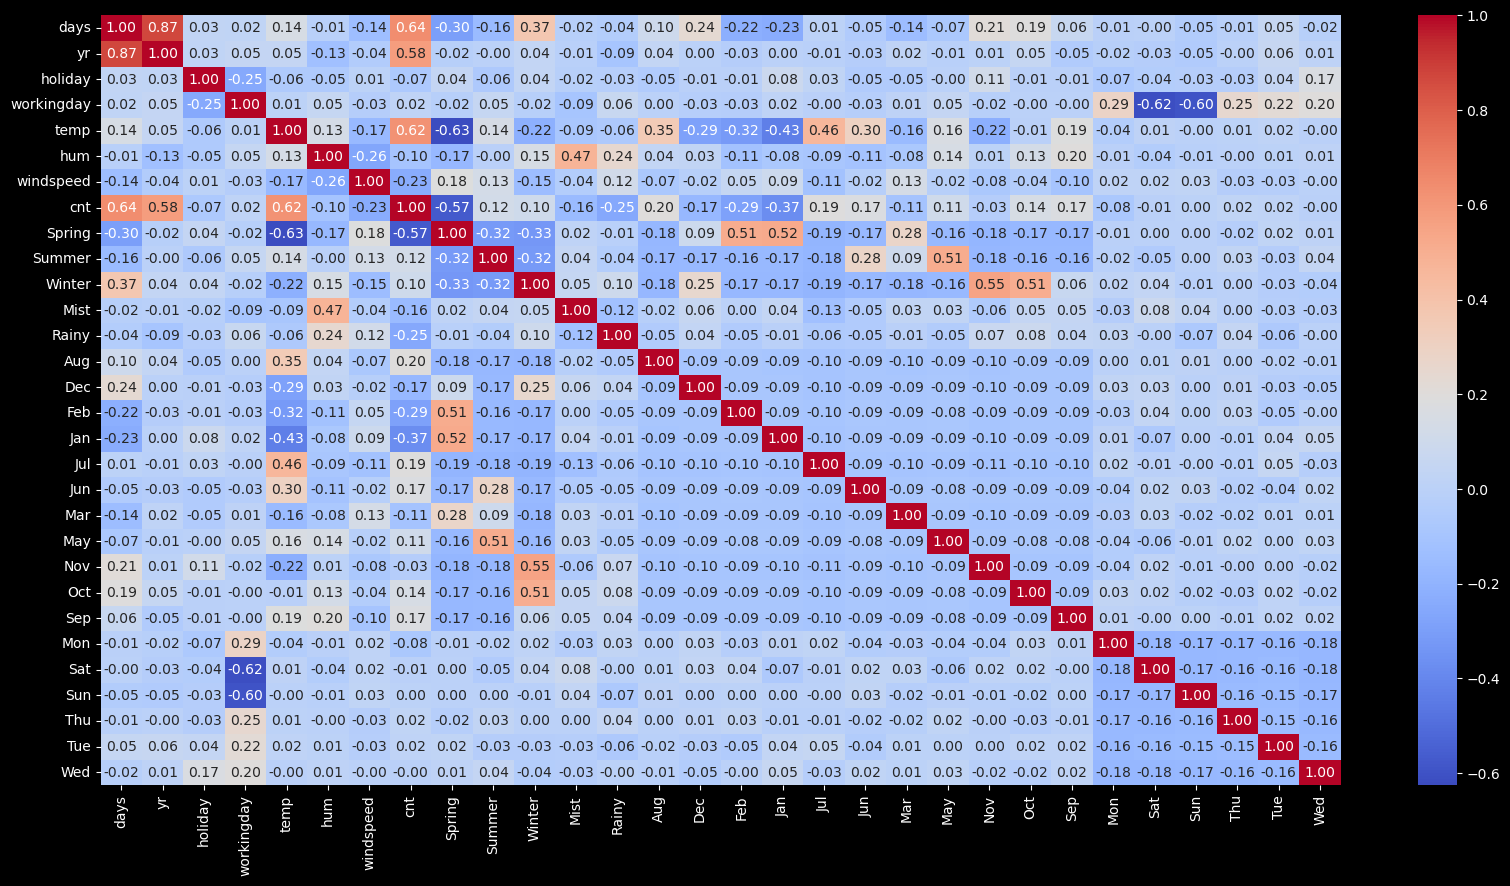

In [23]:
# heatmap to plot the correlation between all the new variables 
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show() 

- We will start off with the variable that is highly correlated with our target variable 'cnt' which is 'temp'.
- Among feature variables, 'days' and 'yr' are very highly correlated, we need to be careful for multicollinearity. 
- Let's build our first model using 'temp' as feature variable and 'cnt' as target variable

#### X_train, y_train

In [24]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# all features 
X_train.head(2)

days  yr  holiday  workingday      temp       hum  windspeed  Spring  \
551  0.755830   1        0           0  0.956434  0.463581   0.218019       0   
567  0.777778   1        0           1  0.746235  0.784062   0.105001       0   

     Summer  Winter  Mist  Rainy  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
551       0       0     0      0    0    0    0    0    1    0    0    0    0   
567       0       0     1      0    0    0    0    0    1    0    0    0    0   

     Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
551    0    0    0    1    0    0    0    0  
567    0    0    1    0    0    0    0    0

In [26]:
# response
y_train.head(2)

551    0.710624
567    0.858886
Name: cnt, dtype: float64

In [27]:
# since we can see that temp is correlated to the target variable 'cnt' the most 
# let's build our first model using temp as feature

# adding constant
X_train_sm = sm.add_constant(X_train['temp'])

# building and fitting model
lr = sm.OLS(y_train, X_train_sm).fit()

# printing summary of first model using 'temp' as first feature
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     319.8
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           7.76e-56
Time:                        19:18:43   Log-Likelihood:                 132.48
No. Observations:                 510   AIC:                            -261.0
Df Residuals:                     508   BIC:                            -252.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.020      8.986      0.000       0.139       0.217
temp           0.6138      0.034     17.883      0.000       0.546       0.681
==============================================================================
Omnibus:                       16.008   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.499
Skew:                           0.167   Prob(JB):                      0.00866
Kurtosis:                       2.421   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We get a model with r-squared of 0.386 and p-value of 'temp' is 0 as well which means it is significant and explains the variance of target variable well. 
- Let's now add 'days' to our model since it was second most correlated with our target variable 'cnt'.

In [28]:
# next we have 'days' that was highly correlated with 'temp'
X_train_sm = sm.add_constant(X_train[['temp', 'days']])

# building model
lr = sm.OLS(y_train, X_train_sm).fit()

# printing summary
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     584.8
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          2.11e-132
Time:                        19:18:43   Log-Likelihood:                 312.95
No. Observations:                 510   AIC:                            -619.9
Df Residuals:                     507   BIC:                            -607.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0098      0.016     -0.605      0.545      -0.042       0.022
temp           0.5331      0.024     21.871      0.000       0.485       0.581
days           0.4604      0.020     22.845      0.000       0.421       0.500
==============================================================================
Omnibus:                       72.180   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.618
Skew:                          -0.874   Prob(JB):                     6.43e-27
Kurtosis:                       4.619   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We see the our R-squared increased significantly from 0.386 to 0.698 after adding 'days'.
- Just to be sure that 'days' is not correlated with temp, let's keep checking VIFs as well.
    - VIF is variance inflation factor that tells us whether a feature is highly correlated with other variables or not.
    - It is used to check multicollinearity in a linear model. 

In [29]:
# calculating vif 
vif = pd.DataFrame()
X = X_train_sm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['VIF'] = round(vif.VIF, 2)
vif

Features   VIF
0     temp  2.98
1     days  2.98

- VIFs are not very high, they are <5, hence we can say that there is no case of multicollinearity.
- Let's now add 'yr' to our model to further improve it. 

In [30]:
# next we have 'yr' that was highly correlated with 'temp'
X_train_sm = sm.add_constant(X_train[['temp', 'days', 'yr']])

# building model
lr = sm.OLS(y_train, X_train_sm).fit()

# printing summary
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     423.5
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.59e-137
Time:                        19:18:43   Log-Likelihood:                 328.19
No. Observations:                 510   AIC:                            -648.4
Df Residuals:                     506   BIC:                            -631.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.016      0.746      0.456      -0.020       0.044
temp           0.5550      0.024     23.121      0.000       0.508       0.602
days           0.2657      0.040      6.641      0.000       0.187       0.344
yr             0.1291      0.023      5.582      0.000       0.084       0.174
==============================================================================
Omnibus:                       58.133   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.323
Skew:                          -0.789   Prob(JB):                     4.89e-19
Kurtosis:                       4.216   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared increased by almost 2% and p-values of variables is 0 making them significant as well. 
- Let's see VIFs to check for multicollinearity. 

In [31]:
# calculating vif 
vif = pd.DataFrame()
X = X_train_sm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending = False, inplace=True)
vif 

Features    VIF
1     days  13.35
2       yr   7.82
0     temp   3.62

- Days VIF has increased significantly making a case of multicollinearity. 
- In heatmap also we saw that 'yr' and 'days' are highly correlated. 
- Let's drop days and rebuild our model.

In [32]:
# dropping days
X_train_sm = sm.add_constant(X_train[['temp', 'yr']])

# building model
lr = sm.OLS(y_train, X_train_sm).fit()

# printing summary
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     565.1
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          8.87e-130
Time:                        19:18:43   Log-Likelihood:                 306.88
No. Observations:                 510   AIC:                            -607.8
Df Residuals:                     507   BIC:                            -595.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0607      0.015      4.037      0.000       0.031       0.090
temp           0.5889      0.024     24.101      0.000       0.541       0.637
yr             0.2630      0.012     22.309      0.000       0.240       0.286
==============================================================================
Omnibus:                       15.783   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.402
Skew:                          -0.415   Prob(JB):                     0.000274
Kurtosis:                       3.286   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared only dipped by 2% which means 'yr' and 'days' were highly correlated and were causing multicollinearity, which we could see in heatmap as well. 
- Let's recheck VIFs for 'temp' and 'yr'.

In [33]:
# calculating vif 
vif = pd.DataFrame()
X = X_train_sm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['VIF'] = round(vif.VIF, 2)
vif  

Features   VIF
0     temp  1.75
1       yr  1.75

- VIFs are pretty low now for both temp and yr after dropping days and hence, no multicollinearity. 

### Recursive Feature Elimination (RFE) 
- Let's use RFE to select 15 best variables for our model based on their significance and VIF (Variance Inflation Factor).
- From there on, we will remove variables if they are insignificant or having high VIF value to refine model.

In [34]:
# before performing RFE, let's drop 'days' from our train dataset
X_train.drop('days', axis=1, inplace=True)

In [35]:
# creating model using all variables first
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# running RFE to select 15 best variables
rfe = RFE(linear_model, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [36]:
# let's print the top15 variables selected by RFE 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 9),
 ('Winter', True, 1),
 ('Mist', False, 2),
 ('Rainy', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 10)]

In [37]:
# now let's build a model using best 15 variables selected by RFE
best_15_vars = X_train.columns[rfe.support_]
best_15_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Rainy', 'Dec', 'Jul', 'Nov', 'Sep', 'Sat', 'Sun'],
      dtype='object')

In [38]:
# let's also check the variables that were not selected by RFE
not_selectedVars = X_train.columns[~rfe.support_] 
not_selectedVars

Index(['Summer', 'Mist', 'Aug', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building Linear Model using RFE selected Variables

In [39]:
# creating X_train_rfe using RFE selected variables
X_train_rfe = X_train[best_15_vars] 

In [40]:
# adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)

# creating first model using RFE selected variables
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary 
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.42e-181
Time:                        19:18:43   Log-Likelihood:                 465.95
No. Observations:                 510   AIC:                            -899.9
Df Residuals:                     494   BIC:                            -832.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4646      0.085      5.475      0.000       0.298       0.631
yr             0.2430      0.009     27.053      0.000       0.225       0.261
holiday       -0.1383      0.072     -1.922      0.055      -0.280       0.003
workingday    -0.0673      0.077     -0.869      0.385      -0.219       0.085
temp           0.4706      0.033     14.138      0.000       0.405       0.536
hum           -0.2980      0.034     -8.780      0.000      -0.365      -0.231
windspeed     -0.1510      0.028     -5.336      0.000      -0.207      -0.095
Spring        -0.1276      0.017     -7.597      0.000      -0.161      -0.095
Winter         0.0937      0.015      6.166      0.000       0.064       0.124
Rainy         -0.1958      0.028     -6.891      0.000      -0.252      -0.140
Dec           -0.0524      0.018     -2.881      0.004      -0.088      -0.017
Jul           -0.0640      0.017     -3.657      0.000      -0.098      -0.030
Nov           -0.0542      0.020     -2.686      0.007      -0.094      -0.015
Sep            0.0587      0.017      3.409      0.001       0.025       0.092
Sat           -0.0680      0.077     -0.878      0.380      -0.220       0.084
Sun           -0.0505      0.077     -0.653      0.514      -0.202       0.101
==============================================================================
Omnibus:                       71.931   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.456
Skew:                          -0.818   Prob(JB):                     2.34e-30
Kurtosis:                       4.935   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We got a R-squared of 0.834 and adj R-squared of 0.829 which is pretty good.<br>
- We have few variables that are having high p-values making them insignificant.
- Let's follow the below approach:
    - Remove variables one-by-one and recheck model's parameters.
    - High P-value - High VIF: definitely Drop
    - High - low:
        1. High p, low VIF : remove these first, then build model again and check VIF again
        2. Low p, high VIF : remove these later
    - Low p-value, low VIF : keep variable

In [41]:
# Sunday is having the highest p-value, let's drop this first and rebuild the model
X_train_rfe.drop('Sun', axis=1, inplace=True) 

In [42]:
# rebuilding model after dropping 'Sun'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary 
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.29e-182
Time:                        19:18:43   Log-Likelihood:                 465.73
No. Observations:                 510   AIC:                            -901.5
Df Residuals:                     495   BIC:                            -838.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4143      0.035     11.698      0.000       0.345       0.484
yr             0.2435      0.009     27.230      0.000       0.226       0.261
holiday       -0.0953      0.029     -3.307      0.001      -0.152      -0.039
workingday    -0.0174      0.013     -1.360      0.175      -0.043       0.008
temp           0.4705      0.033     14.143      0.000       0.405       0.536
hum           -0.2971      0.034     -8.766      0.000      -0.364      -0.231
windspeed     -0.1518      0.028     -5.372      0.000      -0.207      -0.096
Spring        -0.1273      0.017     -7.588      0.000      -0.160      -0.094
Winter         0.0936      0.015      6.163      0.000       0.064       0.123
Rainy         -0.1955      0.028     -6.883      0.000      -0.251      -0.140
Dec           -0.0524      0.018     -2.881      0.004      -0.088      -0.017
Jul           -0.0637      0.017     -3.645      0.000      -0.098      -0.029
Nov           -0.0558      0.020     -2.784      0.006      -0.095      -0.016
Sep            0.0587      0.017      3.414      0.001       0.025       0.092
Sat           -0.0186      0.016     -1.149      0.251      -0.050       0.013
==============================================================================
Omnibus:                       71.911   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.777
Skew:                          -0.820   Prob(JB):                     3.28e-30
Kurtosis:                       4.924   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared did not change at all after dropping 'Sun' which proves that indeed it was insignificant.
- Let's drop 'Sat' now, which is also having a really high p-value making it insignificant.

In [43]:
# dropping 'Sat'
X_train_rfe.drop('Sat', axis=1, inplace=True)

In [44]:
# rebuilding model after dropping 'Sat'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary 
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.76e-183
Time:                        19:18:43   Log-Likelihood:                 465.06
No. Observations:                 510   AIC:                            -902.1
Df Residuals:                     496   BIC:                            -842.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4051      0.035     11.739      0.000       0.337       0.473
yr             0.2435      0.009     27.221      0.000       0.226       0.261
holiday       -0.0870      0.028     -3.118      0.002      -0.142      -0.032
workingday    -0.0079      0.010     -0.808      0.419      -0.027       0.011
temp           0.4686      0.033     14.099      0.000       0.403       0.534
hum           -0.2955      0.034     -8.723      0.000      -0.362      -0.229
windspeed     -0.1516      0.028     -5.364      0.000      -0.207      -0.096
Spring        -0.1281      0.017     -7.633      0.000      -0.161      -0.095
Winter         0.0930      0.015      6.123      0.000       0.063       0.123
Rainy         -0.1971      0.028     -6.945      0.000      -0.253      -0.141
Dec           -0.0529      0.018     -2.907      0.004      -0.089      -0.017
Jul           -0.0633      0.017     -3.622      0.000      -0.098      -0.029
Nov           -0.0564      0.020     -2.815      0.005      -0.096      -0.017
Sep            0.0588      0.017      3.420      0.001       0.025       0.093
==============================================================================
Omnibus:                       69.526   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.866
Skew:                          -0.803   Prob(JB):                     1.04e-28
Kurtosis:                       4.867   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared is still same, only dropped by 0.01. 
- Let's drop 'workingday' now, since its p-value is still very high. 

In [45]:
# dropping 'workingday'
X_train_rfe.drop('workingday', axis=1, inplace=True)

In [46]:
# rebuilding model after dropping 'workingday'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary 
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.66e-184
Time:                        19:18:43   Log-Likelihood:                 464.72
No. Observations:                 510   AIC:                            -903.4
Df Residuals:                     497   BIC:                            -848.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3991      0.034     11.847      0.000       0.333       0.465
yr             0.2431      0.009     27.237      0.000       0.226       0.261
holiday       -0.0814      0.027     -3.012      0.003      -0.135      -0.028
temp           0.4700      0.033     14.162      0.000       0.405       0.535
hum           -0.2963      0.034     -8.755      0.000      -0.363      -0.230
windspeed     -0.1508      0.028     -5.341      0.000      -0.206      -0.095
Spring        -0.1275      0.017     -7.610      0.000      -0.160      -0.095
Winter         0.0934      0.015      6.157      0.000       0.064       0.123
Rainy         -0.1984      0.028     -7.005      0.000      -0.254      -0.143
Dec           -0.0524      0.018     -2.881      0.004      -0.088      -0.017
Jul           -0.0636      0.017     -3.637      0.000      -0.098      -0.029
Nov           -0.0563      0.020     -2.813      0.005      -0.096      -0.017
Sep            0.0589      0.017      3.426      0.001       0.025       0.093
==============================================================================
Omnibus:                       68.943   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.759
Skew:                          -0.794   Prob(JB):                     1.10e-28
Kurtosis:                       4.880   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared didn't change at all which proves how insignificant 'workingday' was. 
- Let's Check VIFs now, since all variables p-value is now ~0 (zero approx.).

In [47]:
# calculating VIFs for our new model
vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif 

Features    VIF
3         hum  14.79
2        temp  13.13
4   windspeed   4.07
6      Winter   2.85
5      Spring   2.61
0          yr   2.01
10        Nov   1.86
9         Jul   1.57
8         Dec   1.40
11        Sep   1.24
7       Rainy   1.12
1     holiday   1.05

- Even though the p-values were low, we found out that:
    - 'hum' has a very high VIF value followed by 'temp'. Let's drop 'hum' first since it is highly correlated with other variables.

In [48]:
# dropping hum since its having a very high VIF
X_train_rfe.drop('hum', axis=1, inplace=True)

In [49]:
# rebuilding model after dropping 'hum'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     189.9
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          3.02e-170
Time:                        19:18:43   Log-Likelihood:                 428.15
No. Observations:                 510   AIC:                            -832.3
Df Residuals:                     498   BIC:                            -781.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.027      7.526      0.000       0.151       0.258
yr             0.2540      0.009     26.779      0.000       0.235       0.273
holiday       -0.0748      0.029     -2.579      0.010      -0.132      -0.018
temp           0.4335      0.035     12.269      0.000       0.364       0.503
windspeed     -0.0833      0.029     -2.857      0.004      -0.141      -0.026
Spring        -0.1298      0.018     -7.216      0.000      -0.165      -0.094
Winter         0.0801      0.016      4.946      0.000       0.048       0.112
Rainy         -0.2657      0.029     -9.084      0.000      -0.323      -0.208
Dec           -0.0563      0.019     -2.886      0.004      -0.095      -0.018
Jul           -0.0400      0.019     -2.157      0.032      -0.076      -0.004
Nov           -0.0476      0.021     -2.218      0.027      -0.090      -0.005
Sep            0.0441      0.018      2.402      0.017       0.008       0.080
==============================================================================
Omnibus:                       82.837   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.632
Skew:                          -0.914   Prob(JB):                     4.84e-36
Kurtosis:                       5.077   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared dropped by 3% almost and is now 80% which is pretty decent as well. 
- All the p-values are ~0, let's move on to VIFs of rest variables to check for multicollinearity after dropping 'hum'.

In [50]:
# calculating VIFs for our new model
vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif 

Features   VIF
2        temp  4.62
3   windspeed  4.03
5      Winter  2.47
0          yr  2.01
9         Nov  1.83
4      Spring  1.72
8         Jul  1.48
7         Dec  1.36
10        Sep  1.24
6       Rainy  1.07
1     holiday  1.05

- All the VIFs are <5 and hence there is no multicollinearity in our current model.
- All variables are significant as well as their p-values are 0. 
- Let's now try adding some more variables that were not selected by RFE, that we think might increase R-squared and make our model better.

In [51]:
# adding new variable 'Summer' to our model to check if it improves
X_train_rfe['Summer'] = X_train['Summer'] 

Rebuilding model after adding `Summer` season

In [52]:
# running linear model after adding 'Summer'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     173.9
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          3.84e-169
Time:                        19:18:43   Log-Likelihood:                 428.26
No. Observations:                 510   AIC:                            -830.5
Df Residuals:                     497   BIC:                            -775.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.034      5.795      0.000       0.129       0.261
yr             0.2538      0.009     26.733      0.000       0.235       0.272
holiday       -0.0747      0.029     -2.574      0.010      -0.132      -0.018
temp           0.4403      0.038     11.494      0.000       0.365       0.516
windspeed     -0.0844      0.029     -2.883      0.004      -0.142      -0.027
Spring        -0.1221      0.025     -4.969      0.000      -0.170      -0.074
Winter         0.0854      0.020      4.288      0.000       0.046       0.125
Rainy         -0.2654      0.029     -9.066      0.000      -0.323      -0.208
Dec           -0.0549      0.020     -2.783      0.006      -0.094      -0.016
Jul           -0.0363      0.020     -1.798      0.073      -0.076       0.003
Nov           -0.0459      0.022     -2.101      0.036      -0.089      -0.003
Sep            0.0472      0.020      2.411      0.016       0.009       0.086
Summer         0.0081      0.018      0.458      0.647      -0.027       0.043
==============================================================================
Omnibus:                       82.348   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.806
Skew:                          -0.914   Prob(JB):                     1.99e-35
Kurtosis:                       5.045   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- No change in r-squared.
- Summer's p-value is 0.6 which is very high making it insignificant. 
- Let's drop 'Summer' and try adding 'Mist' as a feature and see if it helps explain the variance of our target variable.

In [53]:
# dropping summmer 
X_train_rfe.drop('Summer', axis=1, inplace=True)

In [54]:
# adding 'Mist'
X_train_rfe['Mist'] = X_train['Mist']

# rebuilding model 
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.71e-183
Time:                        19:18:43   Log-Likelihood:                 462.32
No. Observations:                 510   AIC:                            -898.6
Df Residuals:                     497   BIC:                            -843.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2514      0.026      9.663      0.000       0.200       0.302
yr             0.2524      0.009     28.427      0.000       0.235       0.270
holiday       -0.0776      0.027     -2.860      0.004      -0.131      -0.024
temp           0.4109      0.033     12.381      0.000       0.346       0.476
windspeed     -0.0931      0.027     -3.408      0.001      -0.147      -0.039
Spring        -0.1372      0.017     -8.136      0.000      -0.170      -0.104
Winter         0.0851      0.015      5.609      0.000       0.055       0.115
Rainy         -0.2960      0.028    -10.720      0.000      -0.350      -0.242
Dec           -0.0573      0.018     -3.139      0.002      -0.093      -0.021
Jul           -0.0513      0.017     -2.946      0.003      -0.085      -0.017
Nov           -0.0655      0.020     -3.239      0.001      -0.105      -0.026
Sep            0.0486      0.017      2.826      0.005       0.015       0.082
Mist          -0.0802      0.010     -8.441      0.000      -0.099      -0.062
==============================================================================
Omnibus:                       75.974   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.202
Skew:                          -0.814   Prob(JB):                     6.00e-36
Kurtosis:                       5.232   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After dropping Summer and adding Mist, there is a significant change in R-squared making it 0.832 now from 0.808. 
- Adj, R-squared is 0.828 which is pretty decent as well. 
- All the variables significance is satisfied since their p-value is ~0.
- Also, let's check VIFs to be sure there is no multicollinearity or ovefitting of model.

In [55]:
# calculating VIFs for our new model
vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif 

Features   VIF
2        temp  4.84
3   windspeed  4.05
5      Winter  2.52
0          yr  2.01
9         Nov  1.83
4      Spring  1.76
11       Mist  1.53
8         Jul  1.50
7         Dec  1.36
10        Sep  1.24
6       Rainy  1.09
1     holiday  1.05

- Each and every variable's VIF is <5 and hence we can confidently say that we have improved our model and it explains the variance of our target variable pretty well. 
- Let's check if there is any room for more improvement by adding another variable, we saw that highest demand in bikes was in the month of August, let's take 'Aug' as our next variable.  

In [56]:
# adding 'Aug' to our train set
X_train_rfe['Aug'] = X_train['Aug']

In [57]:
# rebuilding model after adding 'Aug'
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          8.91e-183
Time:                        19:18:43   Log-Likelihood:                 463.38
No. Observations:                 510   AIC:                            -898.8
Df Residuals:                     496   BIC:                            -839.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.026      9.434      0.000       0.195       0.298
yr             0.2524      0.009     28.454      0.000       0.235       0.270
holiday       -0.0781      0.027     -2.879      0.004      -0.131      -0.025
temp           0.4293      0.036     12.086      0.000       0.360       0.499
windspeed     -0.0962      0.027     -3.514      0.000      -0.150      -0.042
Spring        -0.1365      0.017     -8.101      0.000      -0.170      -0.103
Winter         0.0823      0.015      5.381      0.000       0.052       0.112
Rainy         -0.2966      0.028    -10.750      0.000      -0.351      -0.242
Dec           -0.0557      0.018     -3.047      0.002      -0.092      -0.020
Jul           -0.0618      0.019     -3.278      0.001      -0.099      -0.025
Nov           -0.0637      0.020     -3.152      0.002      -0.103      -0.024
Sep            0.0425      0.018      2.403      0.017       0.008       0.077
Mist          -0.0803      0.009     -8.458      0.000      -0.099      -0.062
Aug           -0.0264      0.018     -1.442      0.150      -0.062       0.010
==============================================================================
Omnibus:                       76.142   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.053
Skew:                          -0.824   Prob(JB):                     2.90e-35
Kurtosis:                       5.184   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Our Model doesn't improve further, we have same R-square of 0.832. 
- The high p-value for 'Aug' indicates that it is insignificant, meaning that 'Aug' does not contribute additional explanatory power to the variance already accounted for by the other variables.
- At this point, it seems like we cannot improve our model further. 
- Let's drop 'Aug'. 

In [58]:
# dropping Aug 
X_train_rfe.drop('Aug', axis=1, inplace=True) 

# rebuilding model 
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary of our latest model without days and dec variables
lm.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.71e-183
Time:                        19:18:43   Log-Likelihood:                 462.32
No. Observations:                 510   AIC:                            -898.6
Df Residuals:                     497   BIC:                            -843.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2514      0.026      9.663      0.000       0.200       0.302
yr             0.2524      0.009     28.427      0.000       0.235       0.270
holiday       -0.0776      0.027     -2.860      0.004      -0.131      -0.024
temp           0.4109      0.033     12.381      0.000       0.346       0.476
windspeed     -0.0931      0.027     -3.408      0.001      -0.147      -0.039
Spring        -0.1372      0.017     -8.136      0.000      -0.170      -0.104
Winter         0.0851      0.015      5.609      0.000       0.055       0.115
Rainy         -0.2960      0.028    -10.720      0.000      -0.350      -0.242
Dec           -0.0573      0.018     -3.139      0.002      -0.093      -0.021
Jul           -0.0513      0.017     -2.946      0.003      -0.085      -0.017
Nov           -0.0655      0.020     -3.239      0.001      -0.105      -0.026
Sep            0.0486      0.017      2.826      0.005       0.015       0.082
Mist          -0.0802      0.010     -8.441      0.000      -0.099      -0.062
==============================================================================
Omnibus:                       75.974   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.202
Skew:                          -0.814   Prob(JB):                     6.00e-36
Kurtosis:                       5.232   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Overall model looks promising and can be accepted as our final model. 
- VIFs we already checked before adding 'Aug' and they were all <5 and hence no multicollinearity. 

## Step 6: Residual Analysis
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
# predicting on training set
y_train_pred = lm.predict(X_train_rfe)
y_train_pred.head() 

551    0.825265
567    0.669215
634    0.836667
511    0.788321
363    0.154547
dtype: float64

In [60]:
# calculating errors (residual) for each prediction (predicted - actual) on training set
residual = y_train_pred - y_train

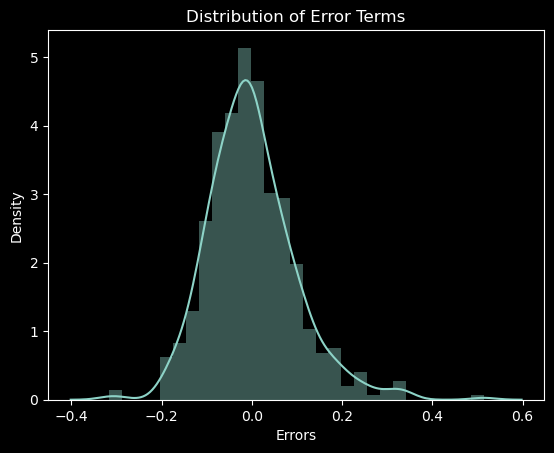

In [61]:
# plotting distplot to check the normality 
sns.distplot(residual)
plt.title("Distribution of Error Terms")
plt.xlabel('Errors')
plt.show() 

- As we can see, distribution of error terms is centered around 0 and is approxiamtely normal.
- Since, the residuals are following a normal distibution with a mean 0, we can conclude that fundamental assumption of linear regression is respected in this case.
- The normality of the error terms indicates that there are no other variables that could better explain the variance of our target variable.
- Therefore, this model is the best we could have developed under the given circumstances.

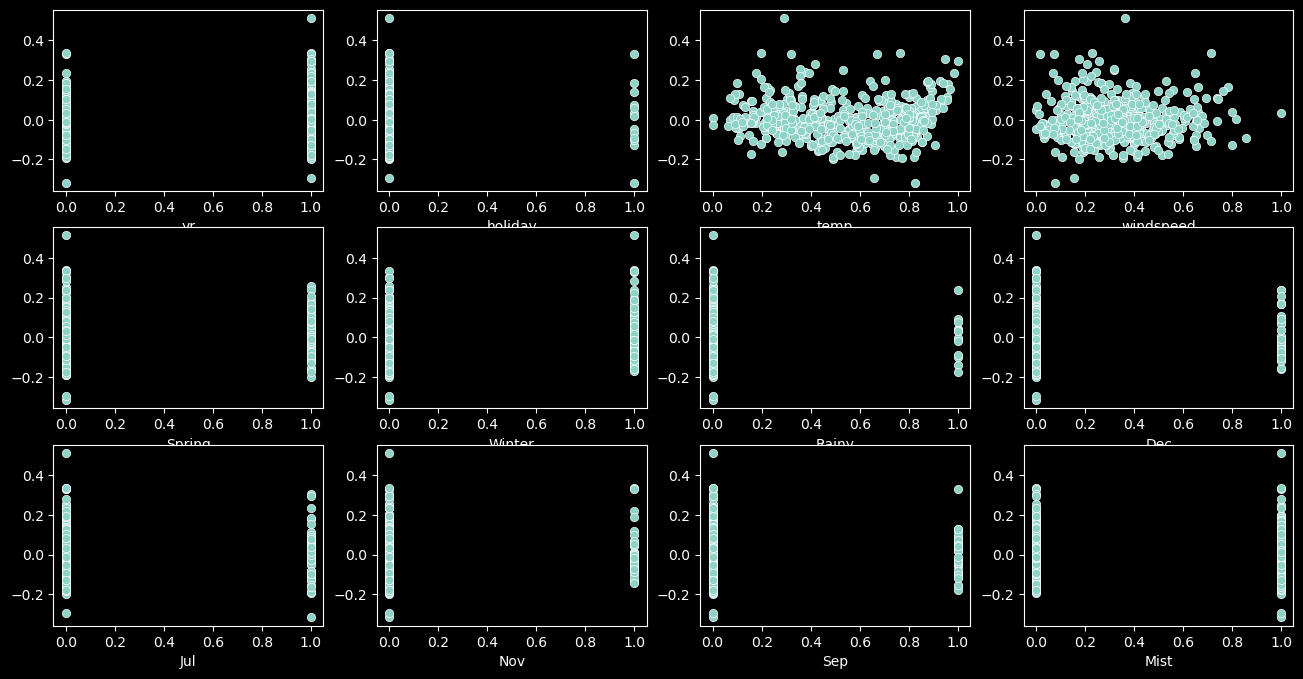

In [62]:
# looking for patterns in residuals for each feature
plt.figure(figsize = (16,8))
for i, feature in enumerate(X_train_rfe.columns[1:]): # skipping const
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=X_train_rfe[feature], y=residual)
plt.show() 

- We can now validate the assumption that errors are independent of each other as well.
- This is because there is **no pattern in errors observed at each value of each feauture variable.** 

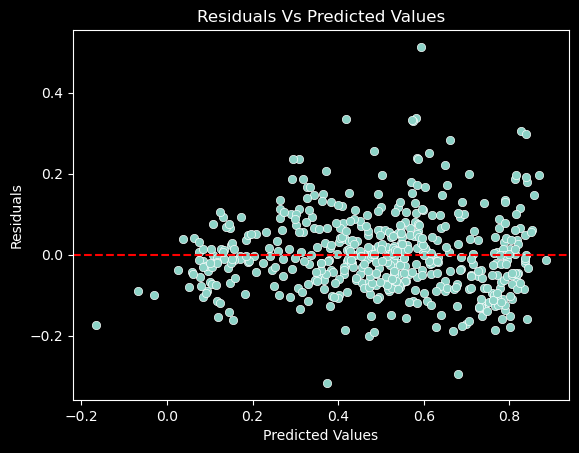

In [63]:
# plotting a scatter plot to check for whether or not error terms have a constant variance
sns.scatterplot(x=y_train_pred, y=residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals Vs Predicted Values")
plt.show()

- The plot shows no clear pattern and the residuals are spread evenly around the horizontal axis.
- Hence, satisfying the assumption of 'Error terms have constant variance'.

## Step 7: Predictions
- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on test sets

In [64]:
# scaling (tranforming using Scaler made on trained set) test_set's numerical variables
num_vars = ['days', 'temp', 'hum', 'windspeed', 'cnt']

# transforming
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head() 

days  yr  holiday  workingday      temp       hum  windspeed  \
489  0.670782   1        0           0  0.686334  0.778064   0.232844   
161  0.220850   0        0           1  0.821384  0.673093   0.236866   
233  0.319616   0        0           1  0.777820  0.483290   0.500685   
339  0.465021   0        0           1  0.478312  0.976435   0.405097   
140  0.192044   0        0           1  0.661284  0.644388   0.162849   

          cnt  Spring  Summer  Winter  Mist  Rainy  Aug  Dec  Feb  Jan  Jul  \
489  0.793936       0       1       0     1      0    0    0    0    0    0   
161  0.557678       0       1       0     0      0    0    0    0    0    0   
233  0.532043       0       0       0     0      0    1    0    0    0    0   
339  0.265344       0       0       1     0      1    0    1    0    0    0   
140  0.661080       0       1       0     0      0    0    0    0    0    0   

     Jun  Mar  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
489    0    0    1    0    0    0    0    0    1    0    0    0  
161    1    0    0    0    0    0    1    0    0    0    0    0  
233    0    0    0    0    0    0    0    0    0    0    0    1  
339    0    0    0    0    0    0    0    0    0    1    0    0  
140    0    0    1    0    0    0    1    0    0    0    0    0

In [65]:
# describing data
df_test.describe()

days          yr     holiday  workingday        temp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.500056    0.509091    0.031818    0.700000    0.514658    0.648628   
std      0.283420    0.501057    0.175916    0.459303    0.234587    0.146507   
min      0.001372    0.000000    0.000000    0.000000   -0.048868    0.327335   
25%      0.249657    0.000000    0.000000    0.000000    0.321207    0.519708   
50%      0.507545    1.000000    0.000000    1.000000    0.515887    0.653385   
75%      0.727709    1.000000    0.000000    1.000000    0.704032    0.762337   
max      0.997257    1.000000    1.000000    1.000000    0.982573    0.976435   

        windspeed         cnt      Spring      Summer      Winter        Mist  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.299820    0.503959    0.240909    0.295455    0.227273    0.327273   
std      0.165661    0.239464    0.428610    0.457287    0.420026    0.470288   
min     -0.049804   -0.051639    0.000000    0.000000    0.000000    0.000000   
25%      0.183037    0.344066    0.000000    0.000000    0.000000    0.000000   
50%      0.275913    0.504498    0.000000    0.000000    0.000000    0.000000   
75%      0.390654    0.690504    0.000000    1.000000    0.000000    1.000000   
max      0.814264    1.019596    1.000000    1.000000    1.000000    1.000000   

            Rainy         Aug         Dec         Feb         Jan         Jul  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.031818    0.077273    0.090909    0.068182    0.090909    0.054545   
std      0.175916    0.267633    0.288135    0.252632    0.288135    0.227609   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.095455    0.081818    0.109091    0.059091    0.095455    0.086364   
std      0.294512    0.274713    0.312464    0.236333    0.294512    0.281541   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mon         Sat         Sun         Thu         Tue         Wed  
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000  
mean     0.122727    0.127273    0.145455    0.168182    0.181818    0.127273  
std      0.328872    0.334038    0.353363    0.374881    0.386574    0.334038  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

- Splitting into X_test and y_test

In [66]:
# response variable i.e. count of users (casual + registered) 
y_test = df_test.pop('cnt')

# features
X_test = df_test

In [67]:
 # only taking the variables that are being used in the model for test set
X_test_lm = X_test[lm.params.index[1:]] # [1:] is done because 'const' is not there in X_test, so we exlude it while subsetting

# now adding constant 
X_test_lm = sm.add_constant(X_test_lm)

# printing first 5 rows
X_test_lm.head() 

const  yr  holiday      temp  windspeed  Spring  Winter  Rainy  Dec  Jul  \
489    1.0   1        0  0.686334   0.232844       0       0      0    0    0   
161    1.0   0        0  0.821384   0.236866       0       0      0    0    0   
233    1.0   0        0  0.777820   0.500685       0       0      0    0    0   
339    1.0   0        0  0.478312   0.405097       0       1      1    1    0   
140    1.0   0        0  0.661284   0.162849       0       0      0    0    0   

     Nov  Sep  Mist  
489    0    0     1  
161    0    0     0  
233    0    0     0  
339    0    0     0  
140    0    0     0

In [68]:
# making predictions on unseen data (test set) using our best model that had ~83.2% of R-squared
y_test_pred = lm.predict(X_test_lm)
y_test_pred.head() 

489    0.683952
161    0.566831
233    0.524372
339    0.141988
140    0.507936
dtype: float64

## Step 8: Model Evaluation

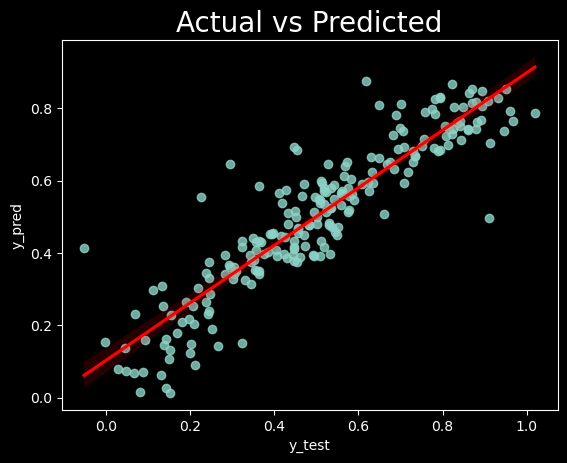

In [69]:
# plotting y_test and y_test_pred to understand the spread
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={'color':'red'})  
plt.title('Actual vs Predicted', fontsize = 20)             
plt.xlabel('y_test')                         
plt.ylabel('y_pred')   
plt.show() 

- The predicted values closely align with the actual values along the best-fit line, indicating that our model makes decent predictions.
---
- Now, let's check and compare the R-squared on the training and testing sets.

In [70]:
#r2_score train set
r2_score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R-squared of train set is ', r2_score_train)

# r2_score of test set
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R-squared of test set is ', r2_score_test)

R-squared of train set is  0.8316583837210242
R-squared of test set is  0.828592549203798


In [71]:
# differnce in r-squared of train and test sets
r2_score_train-r2_score_test

0.003065834517226196

- There is a difference of only 0.003 in $R^2$ values of train and test set which is very small.
- This consistency in $R^2$ values across training and test sets implies that our model is robust. 
- Hence, we can conclude that our model's performance is stable and reliable. 
---
- Let's now check MAE (mean absolute error) and MSE (mean squared error) for both train and test sets.

In [72]:
# calculating mean absolute error

# on train set
train_mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
print('Mean Absolute Error of the Train set is', train_mae)

# on test set
test_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
print('Mean Absolute Error of the Test set is', train_mae) 

Mean Absolute Error of the Train set is 0.07305572250508781
Mean Absolute Error of the Test set is 0.07305572250508781


- MAE (Mean Absolute Error) is 0.07 which is very close to 0 and hence, it means that our model predicts accurately. 

In [73]:
#finding out the mean squared error 

# on trained set
train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
print('Mean squared error of the train set is', train_mse)

# on test set
test_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.009553215158816148
Mean squared error of the test set is 0.009784329483605194


- MSE is ~0 for both Train and Test set.
- ~0 MSE implies model accurately predicts the variance of target variable for both train and test set
---

So, equation of our best fitted line is:
<br>
$ cnt = 0.41\times temp + 0.252\times yr + 0.085\times Winter + 0.048\times Sep - 0.051\times Jul - 0.057\times Dec - 0.065\times Nov - 0.077\times holiday - 0.08\times Mist - 0.093\times Windspeed - 0.137\times Spring - 0.296\times Rainy + 0.251$

In [74]:
# let's check the most important variables in our linear model
lm.params.to_frame().sort_values(by=0, ascending=False)

0
temp       0.410903
yr         0.252438
const      0.251371
Winter     0.085130
Sep        0.048611
Jul       -0.051251
Dec       -0.057296
Nov       -0.065464
holiday   -0.077635
Mist      -0.080199
windspeed -0.093089
Spring    -0.137151
Rainy     -0.296048

- Top 3 most important variables (except intercept 'const') are:
    1. 'temp': temperature
    2. 'yr': Year
    3. 'Winter': Winter season

---

## Summary of Model Analysis and Insights on Bike Rental Demand for BoomBikes

#### Model Performance and Evaluation:

After conducting extensive data interpretation, visualization, data preparation, model building, training, residual analysis, and evaluation, the results are as follows:

- **Model Accuracy**: 
  - The R-squared value for the train set is **83.2%**, and for the test set, it is **82.8%**. This high R-squared value across both sets indicates that our model is robust and capable of explaining the variance in bike rentals accurately.
  
- **Mean Squared Error (MSE)**: 
  - The model’s MSE is close to zero on both training and testing datasets, demonstrating that the model predicts the variance accurately on the test set as well.
  
- **Feature Selection**: 
  - Significant variables were identified using p-values and Variance Inflation Factor (VIF). Recursive Feature Elimination (RFE) was also employed for automated selection of the most impactful variables.

#### Key Insights from Bike Rental Demand Analysis:

1. **Temperature**:
   - **Impact**: Temperature is a key driver of bike rental demand. Temperatures correlate strongly with increased rentals, making it a crucial factor in predicting demand.
  
2. **Wind Speed**:
   - **Impact**: Wind speed negatively affects bike rentals. Higher wind speeds discourage bike usage, resulting in lower rentals on windy days.

3. **Seasonal Trends**:
   - **Fall and Winter**: Rentals peak during the fall season, reflecting a preference for biking in cooler weather. Winter also sees higher rentals compared to summer and spring.
   - **Alignment with EDA**: This observation aligns with our Exploratory Data Analysis (EDA), which indicated a spike in rentals during fall months.

4. **Monthly and Daily Patterns**:
   - **Monthly Trends**: The highest rental activity is observed from June to October, suggesting a seasonal peak.
   - **Daily Trends**: Rentals increase on working days compared to weekends. Holidays see fewer rentals, indicating that weekdays are more favorable for BoomBikes usage.

#### Recommendations:

1. **Marketing Strategy Adjustments**:
   - **Summer and Winter**: Implement targeted marketing campaigns during the summer and winter seasons to boost rentals during these periods.
   - **June Onwards**: Given the rise in rentals from June, enhance marketing efforts or modify pricing plans in the first half of the year to drive rental numbers.

2. **Incentives for Bad Weather Days**:
   - **Less Clear Days**: Introduce incentives or special deals to encourage bike rentals on days with less favorable weather conditions.

3. **Maximize Profits on Clear Days**:
   - **Pricing Strategy**: On days with clear weather, consider adjusting prices to maximize profits, as these are the days with the highest rental demand.

4. **Customer Retention and Growth**:
   - **Trends in Rental Growth**: The significant increase in rentals from 2018 to 2019 indicates growing acceptance and usage of BoomBikes. Conduct thorough analysis to understand customer retention and develop strategies to retain repeat customers.

By implementing these strategies and understanding the underlying patterns in bike rental demand, BoomBikes can optimize their operations and better meet user needs throughout the year.

---